In [138]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

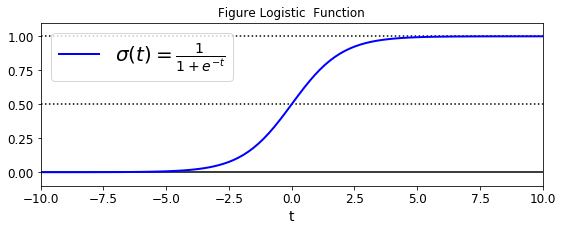

In [139]:
t = np.linspace(-10,10,100)
sig = 1/(1+np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10,10],[0,0],'k-')
plt.plot([-10,10],[0.5,0.5],'k:')
plt.plot([-10,10],[1,1],'k:')
plt.plot([0,0],[-1.1,-1.2],'k-')
plt.plot(t,sig,'b-',linewidth=2,label=r"$\sigma(t) = \frac{1}{1+e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left",fontsize=20)
plt.axis([-10,10,-0.1,1.1])
plt.title('Figure Logistic  Function')
plt.show()


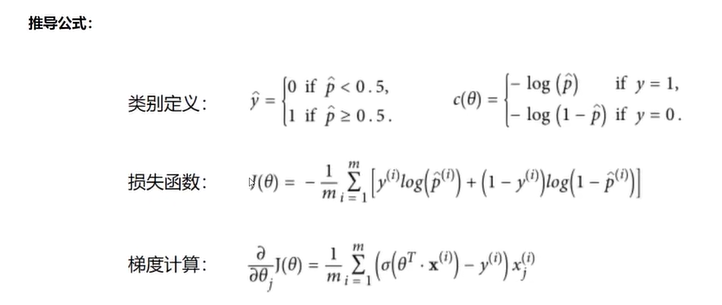

## 加入数据集

In [140]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [141]:
print(iris.DESCR)
iris.target_names

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [142]:
X = iris['data'][:,3:]
y = (iris['target']== 2).astype(np.int)


In [143]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression()
log_res.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_res.predict_proba(X_new)
y_proba

array([[0.98552764, 0.01447236],
       [0.98541511, 0.01458489],
       [0.98530171, 0.01469829],
       ...,
       [0.02620686, 0.97379314],
       [0.02600703, 0.97399297],
       [0.02580868, 0.97419132]])

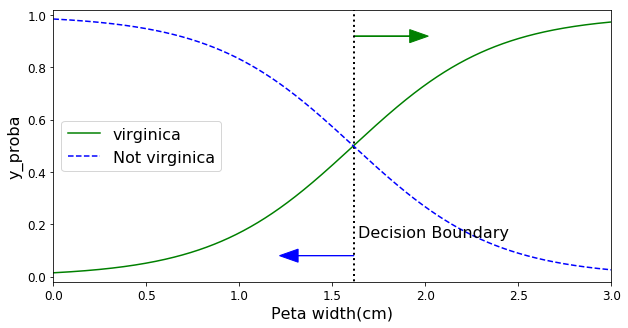

In [145]:
plt.figure(figsize =(10,5))
decision_boundary = X_new[y_proba[:,1]>=0.5][0]
plt.plot([decision_boundary,decision_boundary],[-1,2],'k:',linewidth =2)
plt.plot(X_new,y_proba[:,1],'g-',label ='virginica')
plt.plot(X_new,y_proba[:,0],'b--',label ='Not virginica')
plt.arrow(decision_boundary,0.08,-0.3,0,head_width =0.05,head_length = 0.1,fc='b',ec ='b')
plt.arrow(decision_boundary,0.92,0.3,0,head_width =0.05,head_length = 0.1,fc='g',ec ='g')
plt.text(decision_boundary+0.02,0.15,'Decision Boundary',fontsize = 16,color = 'k')
plt.axis([0,3,-0.02,1.02])
plt.xlabel('Peta width(cm)',fontsize = 16)
plt.ylabel('y_proba',fontsize = 16)
plt.legend(loc = 'center left',fontsize =16)

In [146]:
X =iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.int)


In [147]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression(C = 10000)
log_res.fit(X,y)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 构建坐标数据

In [148]:
X[:,0].min(),X[:,0].max(),X[:,1].min(),X[:,1].max()

(1.0, 6.9, 0.1, 2.5)

In [149]:
x0,x1 = np.meshgrid(np.linspace(2.9,7,500).reshape(-1,1),np.linspace(0.8,2.7,200).reshape(-1,1))


In [150]:
X_new = np.c_[x0.ravel(),x1.ravel()]
X_new,X_new.shape

(array([[2.9       , 0.8       ],
        [2.90821643, 0.8       ],
        [2.91643287, 0.8       ],
        ...,
        [6.98356713, 2.7       ],
        [6.99178357, 2.7       ],
        [7.        , 2.7       ]]), (100000, 2))

In [151]:
y_proba = log_res.predict_proba(X_new)

Text(6.5,2.3,'Vir')

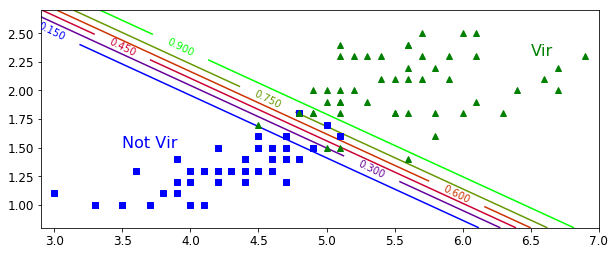

In [152]:
plt.figure(figsize = (10,4))
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')

zz = y_proba[:,1].reshape(x0.shape)
contour = plt.contour(x0,x1,zz,cmap = plt.cm.brg)
plt.clabel(contour,inline =1)
plt.axis([2.9,7,0.8,2.7])
plt.text(3.5,1.5,'Not Vir',fontsize =16, color ='b')
plt.text(6.5,2.3,'Vir',fontsize =16, color ='g')

## 多分类softmax

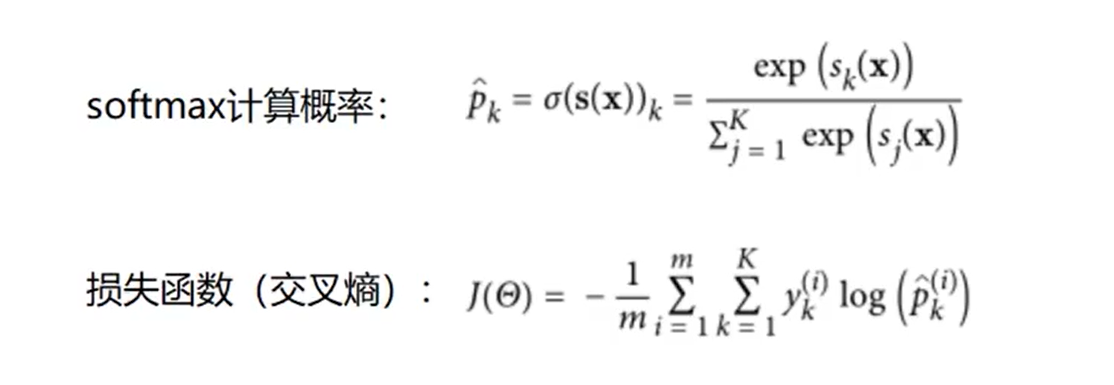

In [153]:
X = iris['data'][:,(2,3)]
y = iris['target']


In [154]:
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
softmax_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [155]:
softmax_reg.predict_proba([[5,2]])

array([[2.42794737e-04, 2.14966717e-01, 7.84790488e-01]])

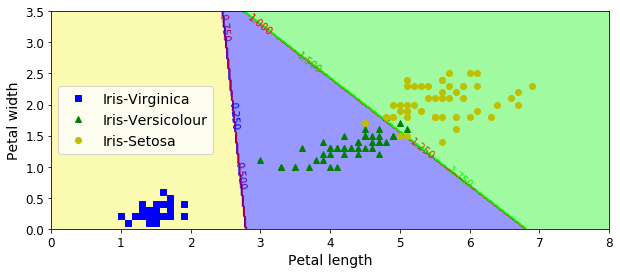

In [156]:
x0,x1 = np.meshgrid(np.linspace(0,8,500).reshape(-1,1),np.linspace(0,3.5,200).reshape(-1,1))
X_new = np.c_[x0.ravel(),x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 =  y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize = (10,4))
plt.plot(X[y==0,0],X[y==0,1],'bs',label = 'Iris-Virginica')
plt.plot(X[y==1,0],X[y==1,1],'g^',label = 'Iris-Versicolour')
plt.plot(X[y==2,0],X[y==2,1],'yo',label = 'Iris-Setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0,x1,zz,cmap = custom_cmap)
contour = plt.contour(x0,x1,zz,cmap = plt.cm.brg)
plt.clabel(contour,inline =1)
plt.xlabel('Petal length',fontsize =14);
plt.ylabel('Petal width',fontsize =14)

plt.legend(loc ='center left',fontsize =14)

plt.axis([0,8,0,3.5])
plt.show()